# **Comprehensive NLP Analysis of Global News Headlines (2019-Present)**

This document presents a **thorough Natural Language Processing (NLP) analysis** of global news headlines spanning from **2019 to the present**. The analysis demonstrates proficiency in fundamental NLP techniques, preprocessing steps, and insightful visualizations that extract meaningful patterns from textual data.

---

## **Table of Contents**

1. [**Introduction**](#introduction)
2. [**Data Exploration**](#data-exploration)
3. [**Data Preprocessing**](#data-preprocessing)
   - [Text Normalization](#text-normalization)
   - [Tokenization](#tokenization)
   - [Stop Words Removal](#stop-words-removal)
   - [Lemmatization](#lemmatization)
   - [Part-of-Speech Tagging](#part-of-speech-tagging)
   - [Named Entity Recognition](#named-entity-recognition)
4. [**Feature Extraction**](#feature-extraction)
   - [Bag of Words](#bag-of-words)
   - [TF-IDF Vectorization](#tf-idf-vectorization)
   - [Word Embeddings](#word-embeddings)
5. [**Sentiment Analysis**](#sentiment-analysis)
   - [Monthly Sentiment Trends](#monthly-sentiment-trends)
   - [Year-over-Year Sentiment Comparison](#year-over-year-sentiment-comparison)
6. [**Topic Modeling**](#topic-modeling)
   - [Latent Dirichlet Allocation](#latent-dirichlet-allocation)
   - [Topic Evolution Over Time](#topic-evolution-over-time)
7. [**Entity Analysis**](#entity-analysis)
   - [Most Mentioned Entities](#most-mentioned-entities)
   - [Entity Co-occurrence Networks](#entity-co-occurrence-networks)
8. [**Time Series Analysis**](#time-series-analysis)
   - [Headline Complexity Over Time](#headline-complexity-over-time)
   - [Topic Seasonality](#topic-seasonality)
9. [**Conclusion**](#conclusion)

---

## **Introduction**

This analysis explores a rich dataset of **news headlines** from **2019 to 2023**, covering **25 of the world's most influential news headlines**. The dataset is structured with **dates** in the first column followed by 25 headlines from each source. By applying various **NLP techniques**, we aim to uncover patterns, trends, and insights that reveal how global news discourse has evolved over this significant period, from sentimental analysis of each day and year to reoccuring patterns of entities and how their sentiment on the media has changed over the years, or as i like to call it, the sentimental derivative. 

---

## **Data Exploration**

Let's begin by loading the dataset and exploring its basic structure:

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import re
import string
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# Set visualization styles
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("viridis")
plt.rcParams['figure.figsize'] = (12, 8)

# Load the dataset
news_df = pd.read_csv('datasets/WorldNewsData.csv')

# Display basic information
print(f"Dataset shape: {news_df.shape}")



# Check the first few rows


# Convert Date column to datetime (note capital "D")
# Since the date format is "May 01, 2018", we need to parse it correctly
news_df['Date'] = pd.to_datetime(news_df['Date'], format="%b %d, %Y")

# Display the date range
print(f"\nTime period: {news_df['Date'].min()} to {news_df['Date'].max()}")

# Create a year-month column for temporal analysis
news_df['year_month'] = news_df['Date'].dt.to_period('M')

# Create a column for the year
news_df['year'] = news_df['Date'].dt.year

# Create a column for the month
news_df['month'] = news_df['Date'].dt.month

# Sample a few rows
print("\nSample data:")
news_df.head()

Dataset shape: (1859, 26)

Time period: 2018-05-01 00:00:00 to 2023-04-30 00:00:00

Sample data:


,Date,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,Top9,...,Top19,Top20,Top21,Top22,Top23,Top24,Top25,year_month,year,month
0,2018-05-01,"North Korea to open its sky, South Korean medi...",The Mueller probe ain't ending anytime soon,BRAND NEW: 2018 – Renault Alpine A110 – Start-...,The story of the Midwestern innocent let loose...,Mattis tempers optimistic outlook on Afghanist...,Facebook is taking on Tinder with new dating f...,OECD chief says Greece deserves debt relief af...,Facebook to launch dating service,U.N. could help Myanmar gather evidence of cri...,...,My Email Newsletter of Curated Marketing Content,Mueller asks for 2 more months before Flynn se...,Mueller asks for 2 more months before Flynn se...,Canada to tack a carbon price of at least 11 c...,Kanye West: 'The class war is one of the reaso...,Michael Stewart/WireImage Kylie Jenner simply ...,For first time health ministry will regulate d...,2018-05,2018,5
1,2018-05-02,'What have they got to fear? ' Trump threatens...,"Best Garage Heater Reviews incuding electric, ...",Apple just fueled everyone's biggest fear abou...,Google accused of using GDPR to impose unfair ...,Man died accidentally after climbing behind wo...,When the coveted Palme d’Or trophy is awarded ...,"""Borders are Illegal?"" Tucker Carlson Vs Dumb ...","Mark Zuckerberg says it will take 3 years to ""...",The 8 Best Cooling Pillows You Can Buy,...,House Republicans nominate Donald Trump for No...,UK's May faces local election losses as key Br...,Whynter ICM-15LS Ice Cream Maker Review,"Abbas says Jews’ behavior, not anti-Semitism, ...",House Republicans nominate Trump for Nobel Pea...,"Tyson Foods the largest U.S. meat processor, h...",Questions linger about how Melania Trump score...,2018-05,2018,5
2,2018-05-03,Hollywood isn’t simply churning out crummy rem...,Iran's foreign minister: US has ‘consistently ...,Rihanna covers the June 2018 problem of Vogue ...,U.S. soldiers are secretly fighting Saudi Arab...,Canadian MP Bob Saroya took trip to China paid...,2017 Best Black Friday and Cyber Monday Mattre...,"NBC, ABC Say Trump Lawyer Michael Cohen Was No...",South Korean janitor may keep gold bars found ...,Last chance: UN warns Cambodia over failing de...,...,Marketing’s Customer Obsession Imperative | C3...,Ex-Trump aide Michael Caputo warns: Mueller Ru...,11-Year-Old Girl With Autism Wouldn’t Talk In ...,Richard Corkery/NY Each day Information throug...,What Makes the Brand Stand Out?,UK drones in Syria using controversial 'vacuum...,"High fruit diet could help women conceive, stu...",2018-05,2018,5
3,2018-05-04,Donald Trump says London hospital is 'like a w...,German seat on UN Security Council likely as I...,Gang Used Drone Swarm To Thwart FBI Hostage Raid,How Many Carbs Should You Eat Per Day To Lose ...,Russian Troll Farm Goes After Mueller’s Files,Israeli soldiers singing in Persian for Irania...,Labor Day 2017 Sales on Memory Foam Mattresses...,"How a Chinese city turned all its 16,000 buses...",Jamie Acourt arrested in Spain over suspected ...,...,How to Increase Sales by Encouraging Mobile Sp...,China’s schooling Trump on the art of the delay,Abi Ofarim ist tot,The 8 Best Snow Boots For Women,Kerry quietly seeking to salvage Iran deal he ...,Trump's Syria aid freeze hits 'White Helmets' ...,US slams Turkey over population transfers in A...,2018-05,2018,5
4,2018-05-05,Missing teen’s mom implores Canada to take not...,William and Kate release new pictures of Princ...,MEGHANS BROTHER SENDS PRINCE HARRY A SECRET LE...,Australia: Free whooping cough vaccine will be...,Shock and Thaw—Alaskan Sea Ice Just Took a Ste...,Giuliani: Trump is 'committed to' regime chang...,Pakistan: Polio eradication teams will visit d...,"Aides to Donald Trump, the US president, hired...",Donald Trump’s NRA speech causes anger in U.K....,...,Revealed: Trump team hired spy firm for ‘dirty...,A Simple Way to Improve a Billion Lives: Eyegl...,Dutch cop requests removal of Holocaust memori...,Montreal couple agree to submit

## There are some duplicate months in the original data, (like October 2020) Lets remove the duplicates and clear the dataset. Next, let's create a function to combine all headlines for each date into a single text corpus, this will be useful later on.

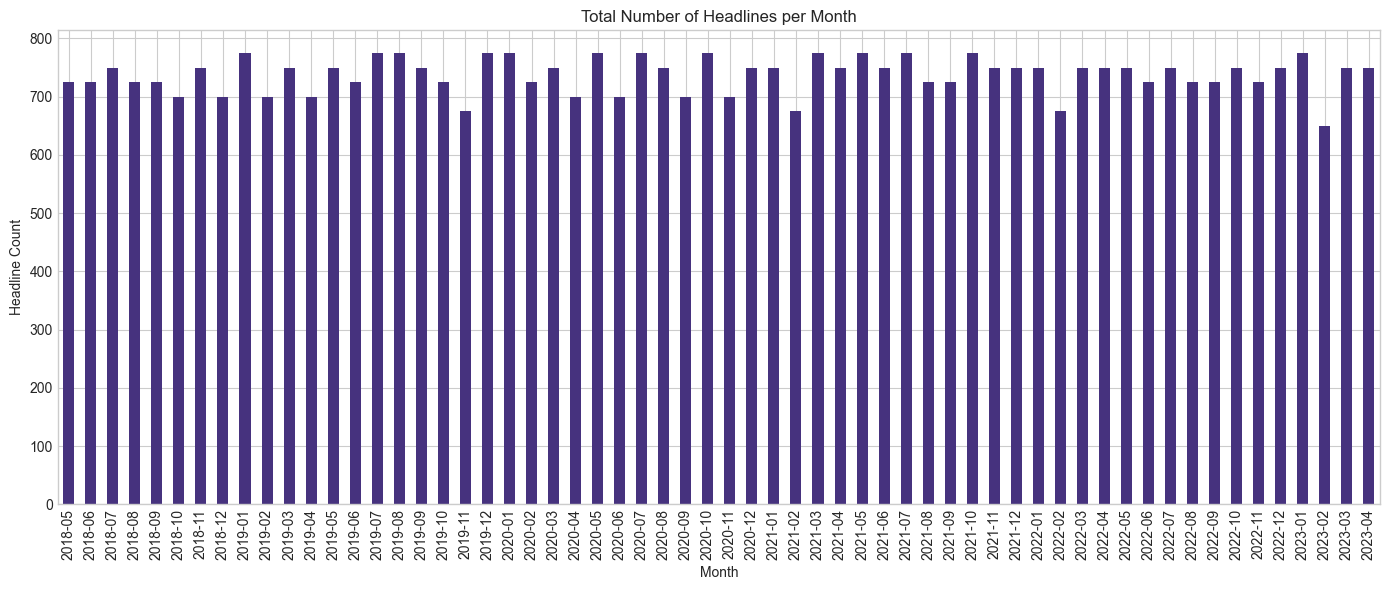

In [33]:
# Ensure 'Date' is in datetime format
news_df['Date'] = pd.to_datetime(news_df['Date'])

# Drop duplicate dates, keeping the first occurrence
news_df = news_df.drop_duplicates(subset='Date', keep='first')

def combine_headlines(row):
    """Combine all headlines in a row into a single string"""
    headlines = []
    # Start from column 'Top1' through 'Top25'
    for col in news_df.columns[1:26]:  # Skip the Date column, include only Top1-Top25
        if pd.notna(row[col]):
            headlines.append(str(row[col]))
    return ' '.join(headlines)

# Apply the function to create a new column with combined headlines
news_df['combined_headlines'] = news_df.apply(combine_headlines, axis=1)

headlines_per_month = news_df.groupby(news_df['Date'].dt.to_period('M')).size() * 25

plt.figure(figsize=(14, 6))
headlines_per_month.plot(kind='bar')
plt.title('Total Number of Headlines per Month')
plt.xlabel('Month')
plt.ylabel('Headline Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Create a new column that stores the list of non-null individual headlines (Top1–Top25)
def get_separate_headlines(row):
    """Return a list of non-empty individual headlines"""
    return [str(row[col]) for col in news_df.columns[1:26] if pd.notna(row[col])]

news_df['separate_headlines'] = news_df.apply(get_separate_headlines, axis=1)

# Count number of headlines (not assuming all 25 filled)
news_df['headline_count'] = news_df['separate_headlines'].apply(len)

# Group by month and sum all actual headlines
separate_headlines_per_month = news_df.groupby(news_df['Date'].dt.to_period('M'))['headline_count'].sum()


# Now our data looks clear and no unusual spikes showing duplicate data! Before diving into the depths of data processing, we need to normalize our dataset. Normalization is like organizing a dataset, we need to remove symbols, lowercase everything, remove numbers, non-UNICODE letters, and some other things based on what we need, we might need to remove words like "in, and, out, of" (which are called stopwords) because they might skew the data by introducing unnecessary bias. We actually took our first step already by removing duplicates! We will do a general normalization here and might use more in depth techniques like lemmatization or stemming based on our needs. 

In [29]:
import re
import string

def normalize_text(text):
    """
    Normalize text by:
    1. Converting to lowercase
    2. Removing punctuation (including apostrophes)
    3. Removing numbers
    4. Removing extra whitespace
    """
    if not isinstance(text, str):
        return ""
    
    # lowercase conversion
    text = text.lower()
    
    # We have to specially take care of apostrophes, because words like "isn't" or "ain't" become "isn t" and "ain t" and introducing whitespace
    # makes them separate words. so we concatenate, or more precisely, change the apostrophe with nothing, so it is concatenated.
    text = re.sub(r"'", '', text)
    
    # punctuation removal (including en dash explicitly because for some reason it wasn't getting removed (?))
    text = re.sub(f'[{string.punctuation}–]', ' ', text)

    # Remove HTML entities like &amp;, &lt;, &gt; by using a regular expression,  "&" and such look like "amp" in our csv.
    text = re.sub(r'&[a-zA-Z]+;', '', text)
    text = re.sub(r'[“”‘’•–—]', '', text)
    
    # number removal
    text = re.sub(r'\d+', '', text)
    
    # extra whitespace removal
    text = re.sub(r'\s+', ' ', text)
    
    return text.strip()

# Apply normalization
news_df['normalized_text'] = news_df['combined_headlines'].apply(normalize_text)

# Filter out rows that contain only dates or metadata (assuming Date is in the first column)
news_df = news_df[news_df['Date'].notna() & (news_df['combined_headlines'] != '')]

# Display a sample of normalized text
print("Original headline:")
print(news_df['combined_headlines'].iloc[0][:400])
print("\nNormalized headline:")
print(news_df['normalized_text'].iloc[0][:400])


Original headline:
North Korea to open its sky, South Korean media reports. The Mueller probe ain't ending anytime soon BRAND NEW: 2018 – Renault Alpine A110 – Start-UP &amp; Loud Sound! The story of the Midwestern innocent let loose in the big city has been a trope in successful comedies from “Tales of the City” (1993) to “Girls” (2012). “Sweetbitter,” a new, six-episode series on Starz, takes another naif, doe-eye

Normalized headline:
north korea to open its sky south korean media reports the mueller probe aint ending anytime soon brand new renault alpine a start up amp loud sound the story of the midwestern innocent let loose in the big city has been a trope in successful comedies from tales of the city to girls sweetbitter a new six episode series on starz takes another naif doe eyed tess ella purnell and sets her loose in th


# We are getting there, Now its time for tokenization! 
 Tokenization is the process of breaking text into individual words or tokens, I will use NLTK for this. 

We stored the normalized dataset in the variable "text", lets play around with it, and tokenize!

Tokenized words (first 20):
['north', 'korea', 'to', 'open', 'its', 'sky', 'south', 'korean', 'media', 'reports', 'the', 'mueller', 'probe', 'aint', 'ending', 'anytime', 'soon', 'brand', 'new', 'renault', 'alpine', 'a', 'start', 'up', 'amp', 'loud', 'sound', 'the', 'story', 'of', 'the', 'midwestern', 'innocent', 'let', 'loose', 'in', 'the', 'big', 'city', 'has']

Tokenized sentences (first 2):
['north korea to open its sky south korean media reports the mueller probe aint ending anytime soon brand new renault alpine a start up amp loud sound the story of the midwestern innocent let loose in the big city has been a trope in successful comedies from tales of the city to girls sweetbitter a new six episode series on starz takes another naif doe eyed tess ella purnell and sets her loose in the new york city of mattis tempers optimistic outlook on afghanistan after twin bombings facebook is taking on tinder with new dating features oecd chief says greece deserves debt relief after enormous 

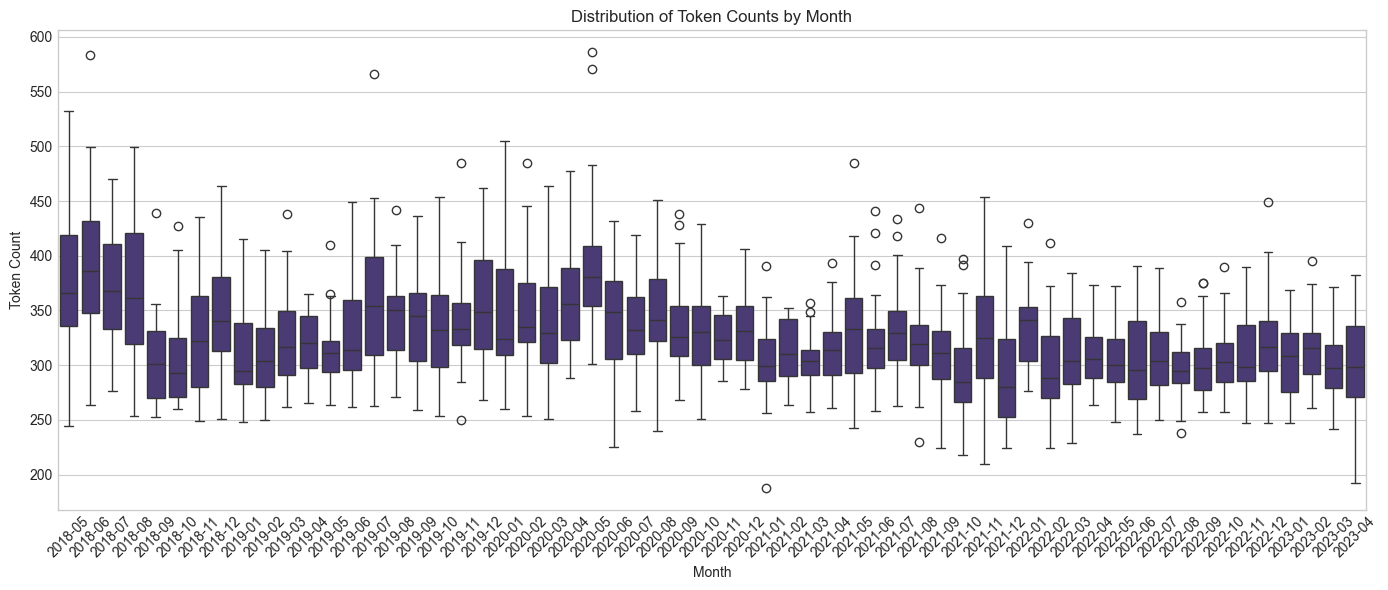

In [31]:
# Downloading necessary NLTK resources, if you've imported everything from requirements.txt, you should be good to go, but if you get errors, turn the comment
# down below into a codeblock to import necessary libraries.
from nltk.tokenize import word_tokenize, sent_tokenize

# word based tokenization
def tokenize_text(text):
    """splits text into individual words"""
    return word_tokenize(text)

# sentence based tokenization
def sentence_tokenize(text):
    """splits text into sentences"""
    return sent_tokenize(text)

# applying tokenization
news_df['tokens'] = news_df['normalized_text'].apply(tokenize_text)
news_df['sentences'] = news_df['normalized_text'].apply(sentence_tokenize)  # changed this line only

# sample tokenization test
print("Tokenized words (first 20):")
print(news_df['tokens'].iloc[0][:40])
print("\nTokenized sentences (first 2):")
print(news_df['sentences'].iloc[0][:2])

# Calculate basic token statistics
news_df['token_count'] = news_df['tokens'].apply(len)
news_df['avg_token_length'] = news_df['tokens'].apply(lambda x: np.mean([len(token) for token in x]) if x else 0)
news_df['sentence_count'] = news_df['sentences'].apply(len)

# Create a month column
news_df['Month'] = news_df['Date'].dt.to_period('M').astype(str)

plt.figure(figsize=(14, 6))
sns.boxplot(x='Month', y='token_count', data=news_df)
plt.title('Distribution of Token Counts by Month')
plt.xlabel('Month')
plt.ylabel('Token Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
